# General Stationary Gravitational Vacuum Field of Cylindrical Symmetry by Frehland
##  Geoff Cope
##  Univeristy of Utah
##  December 30, 2021

Here we concentrate on metric 1.2 which for a = 0 gives Weyl's canonical coordinates.  Other metrics in this paper are the Kasner solution equation 3.2 

https://link.springer.com/article/10.1007/BF01877754

https://www.jstor.org/stable/1989060?seq=1#metadata _info _tab_contents

It was Edward Kasner's newphew who invented the word "googol"  :)

http://www.nasonline.org/publications/biographical-memoirs/memoir-pdfs/kasner-edward.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
r,phi,z,t,dr,dphi,dz,dt = symbols( 'r phi z t dr dphi dz dt' ) 

In [44]:
u = Function('u')(r)
u

In [45]:
k = Function('k')(r)
k

In [46]:
a = Function('a')(r)
a

In [47]:
variables = Matrix( [r,phi,z,t] )
variables

⎡r⎤
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣t⎦

In [48]:
differentials = Matrix( [dr,dphi,dz,dt] ) 
differentials

⎡ dr ⎤
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣ dt ⎦

In [49]:
lineElement = expand(exp(2*u) * (dt + a*dphi)**2 - exp(2*(k-u)) *( dr**2 + dz**2 )  + r**2 * exp(-2*u)* dphi**2 ) 
lineElement

In [50]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅k(r)  -2⋅u(r)                                                              ⎤
⎢-ℯ      ⋅ℯ                      0                       0               0      ⎥
⎢                                                                               ⎥
⎢                    2  -2⋅u(r)    2     2⋅u(r)                           2⋅u(r)⎥
⎢        0          r ⋅ℯ        + a (r)⋅ℯ                0          a(r)⋅ℯ      ⎥
⎢                                                                               ⎥
⎢                                                  2⋅k(r)  -2⋅u(r)              ⎥
⎢        0                       0               -ℯ      ⋅ℯ              0      ⎥
⎢                                                                               ⎥
⎢                                2⋅u(r)                                2⋅u(r)   ⎥
⎣        0                 a(r)⋅ℯ                        0            ℯ         ⎦

In [11]:
import sympy

In [51]:
m = sympy.Array(g)
m

⎡  2⋅k(r)  -2⋅u(r)                                                              ⎤
⎢-ℯ      ⋅ℯ                      0                       0               0      ⎥
⎢                                                                               ⎥
⎢                    2  -2⋅u(r)    2     2⋅u(r)                           2⋅u(r)⎥
⎢        0          r ⋅ℯ        + a (r)⋅ℯ                0          a(r)⋅ℯ      ⎥
⎢                                                                               ⎥
⎢                                                  2⋅k(r)  -2⋅u(r)              ⎥
⎢        0                       0               -ℯ      ⋅ℯ              0      ⎥
⎢                                                                               ⎥
⎢                                2⋅u(r)                                2⋅u(r)   ⎥
⎣        0                 a(r)⋅ℯ                        0            ℯ         ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("r phi z t")
r,phi,z,t = syms

In [52]:
metric = MetricTensor(m,syms)

In [53]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢⎡d          d                                                                              
⎢⎢──(k(r)) - ──(u(r))                                    0                                  
⎢⎢dr         dr                                                                             
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                     ⎛   2 d              ⎛     d          d       ⎞       4⋅u(r)⎞  -2⋅k(r
⎢⎢         0           ⎜- r ⋅──(u(r)) + r + ⎜a(r)⋅──(u(r)) + ──(a(r))⎟⋅a(r)⋅ℯ      ⎟⋅ℯ      
⎢⎢                     ⎝     dr             ⎝     dr         dr      ⎠

In [54]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                  2        
⎢                                          d          d           4⋅u(r) ⎛d       ⎞         
⎢    2                     2     2         ──(k(r))   ──(u(r))   ℯ      ⋅⎜──(a(r))⎟         
⎢   d            ⎛d       ⎞     d          dr         dr                 ⎝dr      ⎠         
⎢- ───(k(r)) - 2⋅⎜──(u(r))⎟  + ───(u(r)) + ──────── + ──────── - ───────────────────        
⎢    2           ⎝dr      ⎠      2            r          r                  2               
⎢  dr                          dr                                        2⋅r                
⎢                                                                                           
⎢                                                                                     ⎛     
⎢                                                                                     ⎜     
⎢                                                                     

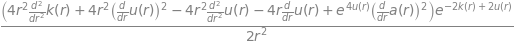

In [55]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                 ∂         
⎢    2              2                           2     2              2            ──(k(r, z)
⎢   ∂              ∂               ⎛∂          ⎞     ∂              ∂             ∂r        
⎢- ───(k(r, z)) - ───(k(r, z)) - 2⋅⎜──(u(r, z))⎟  + ───(u(r, z)) + ───(u(r, z)) + ──────────
⎢    2              2              ⎝∂r         ⎠      2              2                 r    
⎢  ∂r             ∂z                                ∂r             ∂z                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [21]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [56]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                  2        
⎢                                          d          d           4⋅u(r) ⎛d       ⎞         
⎢    2                     2     2         ──(k(r))   ──(u(r))   ℯ      ⋅⎜──(a(r))⎟         
⎢   d            ⎛d       ⎞     d          dr         dr                 ⎝dr      ⎠         
⎢- ───(k(r)) - 2⋅⎜──(u(r))⎟  + ───(u(r)) + ──────── + ──────── - ───────────────────        
⎢    2           ⎝dr      ⎠      2            r          r                  2               
⎢  dr                          dr                                        2⋅r                
⎢                                                                                           
⎢                                                                                     ⎛     
⎢                                                                                     ⎜     
⎢                                                                     

In [57]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡                                                                                       2   
⎢                                            ∂                   4⋅u(r, z) ⎛∂          ⎞    
⎢               2                    2   1.0⋅──(k(r, z))   0.25⋅ℯ         ⋅⎜──(a(r, z))⎟    
⎢  ⎛∂          ⎞        ⎛∂          ⎞        ∂r                            ⎝∂r         ⎠    
⎢- ⎜──(u(r, z))⎟  + 1.0⋅⎜──(u(r, z))⎟  + ─────────────── - ────────────────────────────── + 
⎢  ⎝∂r         ⎠        ⎝∂z         ⎠           r                         2                 
⎢                                                                        r                  
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [27]:
Eq(diff(k,z), solve( Ric.tensor()[0,2] , diff(k,z) )[0])

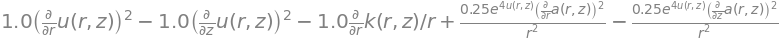

In [72]:
einsteinSimplifed[2,2]

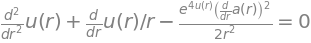

In [86]:
equation1pt3a = Eq(expand((1/r**2)*ricciSimplified[3,3].args[1]),0)
equation1pt3a

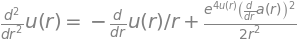

In [92]:
d2udr2 = Eq(diff(u,r,r), expand(solve( equation1pt3a, diff(u,r,r))[0] ))
d2udr2

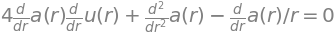

In [100]:
equation1pt3b = Eq(expand((1/r)*simplify(ricciSimplified[1,3].args[2].subs(d2udr2.args[0],d2udr2.args[1])).args[1]),0)
equation1pt3b

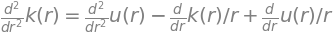

In [82]:
d2kdr2 = Eq(diff(k,r,r),expand(solve( ricciSimplified[2,2].args[1] , diff(k,r,r) )[0]))
d2kdr2

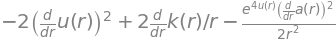

In [87]:
equation1pt3c = ricciSimplified[0,0].subs(d2kdr2.args[0],d2kdr2.args[1])
equation1pt3c

In [102]:
# PLEASE NOTE!!! first equation last term has different sign.  Last equation last term also has different sign
vacuumFieldEquations = Matrix([equation1pt3a,equation1pt3b,equation1pt3c])
vacuumFieldEquations

⎡                                           2      ⎤
⎢              d           4⋅u(r) ⎛d       ⎞       ⎥
⎢    2         ──(u(r))   ℯ      ⋅⎜──(a(r))⎟       ⎥
⎢   d          dr                 ⎝dr      ⎠       ⎥
⎢  ───(u(r)) + ──────── - ─────────────────── = 0  ⎥
⎢    2            r                  2             ⎥
⎢  dr                             2⋅r              ⎥
⎢                                                  ⎥
⎢                                    d             ⎥
⎢                          2         ──(a(r))      ⎥
⎢    d        d           d          dr            ⎥
⎢  4⋅──(a(r))⋅──(u(r)) + ───(a(r)) - ──────── = 0  ⎥
⎢    dr       dr           2            r          ⎥
⎢                        dr                        ⎥
⎢                                                  ⎥
⎢                                                 2⎥
⎢                    d           4⋅u(r) ⎛d       ⎞ ⎥
⎢              2   2⋅──(k(r))   ℯ      ⋅⎜──(a(r))⎟ ⎥
⎢    ⎛d       ⎞      dr                 ⎝dr   